In [1]:
## import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## load the dataset
dataset = pd.read_csv('Mall_Customers.csv')

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
## Out of all the features, CustomerID, Age and Gender are irrelevant fields 
## and can be dropped and create a matrix of independent variables 
## by select only Annual Income & SpendingScore.

X = dataset.iloc[ : , [3, 4]].values

## remember ,its Unsupervised , so we cannot use variable y

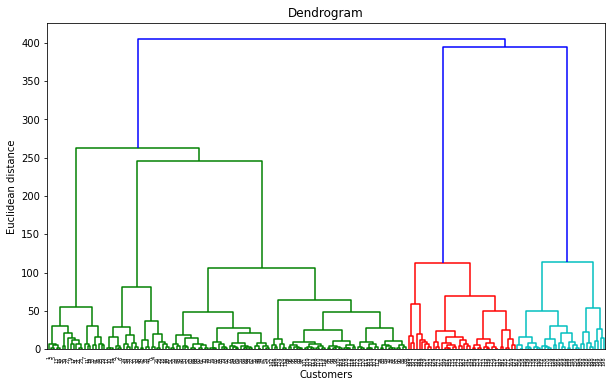

In [4]:
## Next, we need to choose the number of clusters 
## and for doing this we’ll use Dendrograms.

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,6))

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
## https://www.statisticshowto.com/wards-method/
## for Math lovers : https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

## can try other methods like single , complete , average 
# dendrogrm = sch.dendrogram(sch.linkage(X, method = 'average'))
## Did u notice , that wards-method creates least no. of clusters 

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [5]:
## As we have already discussed to choose the number of clusters 
## we draw a horizontal line to the longest line that traverses maximum distance up and down 
## without intersecting the merging points. 
## So we draw a horizontal line and the number of vertical lines 
## it intersects is the optimal number of clusters.

## In this case, it's 5. 
##So let's fit our Agglomerative model with 5 clusters.

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, 
                             affinity = 'euclidean', 
                             linkage = 'ward')
## https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
## If linkage is “ward”, only “euclidean” is accepted.

y_hc = hc.fit_predict(X)

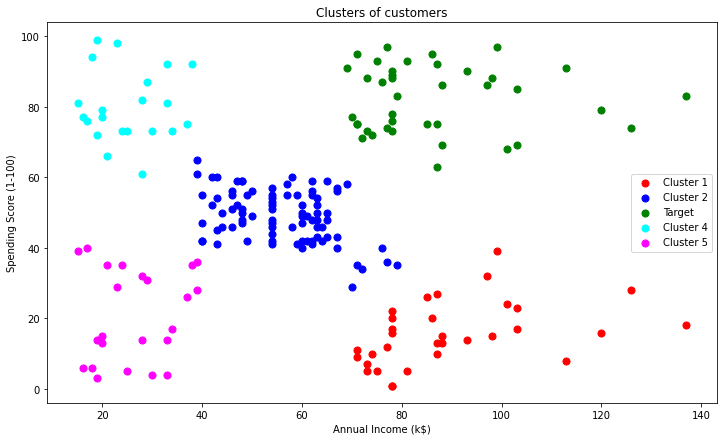

In [6]:
# Visualising the clusters
plt.figure(figsize=(12,7))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**What is the Observation ?**

**Cluster 1 (Red Color)** -> high level earning and low-spending <br>

**Cluster 2 (Blue Color)** -> mid-level earners and mid-level spenders <br>

**Cluster 3 (Green Color)** -> earning high and also spending high **[TARGET SET]**

**Cluster 4 (cyan Color)** -> earning less ,  spending high

**Cluster 5 (magenta Color)** -> Earning less , spending less

<hr>
<font color='green'><b>Outcome of the Analysis : </b></font><br>
We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these <b>Target Customers</b> can easily be convinced to buy newer brand products. <b>Wherein others we can set like once in a week or once in a month. </b>
